<a href="https://colab.research.google.com/github/Emiliewu/datascience-assignments/blob/main/week3_day2_multivariate_barplot_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
fpath="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-cleaned-eda.csv"
df = pd.read_csv(fpath)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,...,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,...,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,...,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


In [6]:
df['Bldg Type'].value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg Type, dtype: int64

In [8]:
# Bar Plots with Matplotlib
bldg_type_prices = df.groupby('Bldg Type')['SalePrice'].mean()
bldg_type_prices

Bldg Type
1Fam      185589.360825
2fmCon    125581.709677
Duplex    139808.935780
Twnhs     135934.059406
TwnhsE    192311.914163
Name: SalePrice, dtype: float64

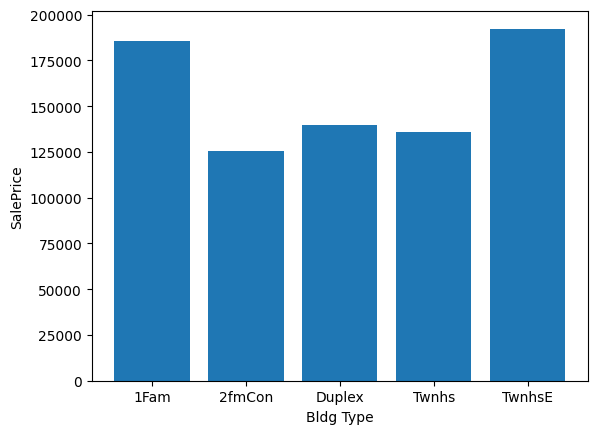

In [11]:
fig, ax = plt.subplots()
ax.bar(bldg_type_prices.index, bldg_type_prices.values);
ax.set_ylabel('SalePrice')
ax.set_xlabel('Bldg Type');

#Bar Graph Using Pandas
If we wanted to use Panda's .plot(), we could reference our group means series and add .plot(kind='bar')
To be able to update the plot with matplotlib commands, we must save the plot as a variable (note the "ax =" in the first line of code)

* By saving the plot object, we are able to add the y label by using "ax.set_ylabel()"

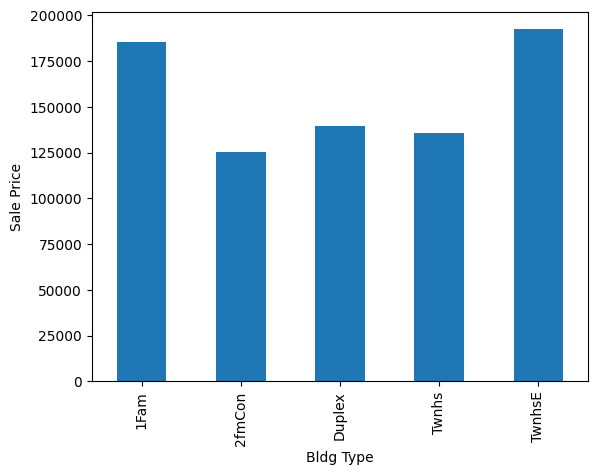

In [12]:
# pandas to plot
ax = bldg_type_prices.plot(kind='bar')
ax.set_ylabel('Sale Price');

# Bar Graph Using Seaborn
The beauty of using Seaborn's barplot function is that we do not need to calculate the group means first. Seaborn will calculate the means and it will even add error bars to show how spread out the data is for each group!

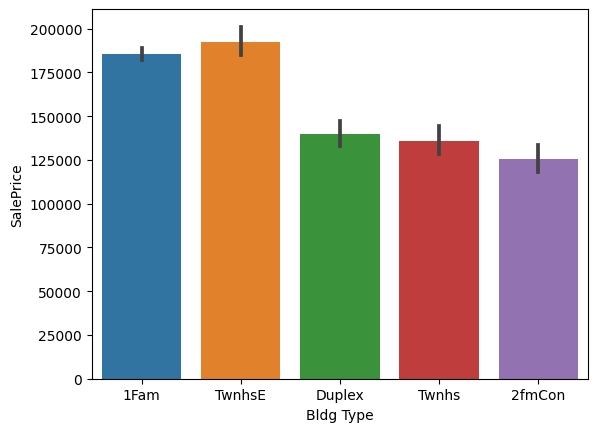

In [13]:
# user seaborn to plot the group means
ax = sns.barplot(data=df, x='Bldg Type', y='SalePrice')

Notice how much work Seaborn has done for us:

* it calculated the group means.
* it plotted the group means as bars.
* it added a y-label and an x-label for us.
* it used a separate color for each group.
it added error bars to indicate the variability within each category.

# Creating Grouped Bar Charts (using Seaborn's hue argument)
Another benefit to using Seaborn's barplot is that we can easily break out our data by another categorical feature and create a grouped bar plot with very little effort. All we have to do is add the "hue" argument and specify which column we want to use to color our groups.

Let's add hue='Central Air' to add if the home has Central Air or not.

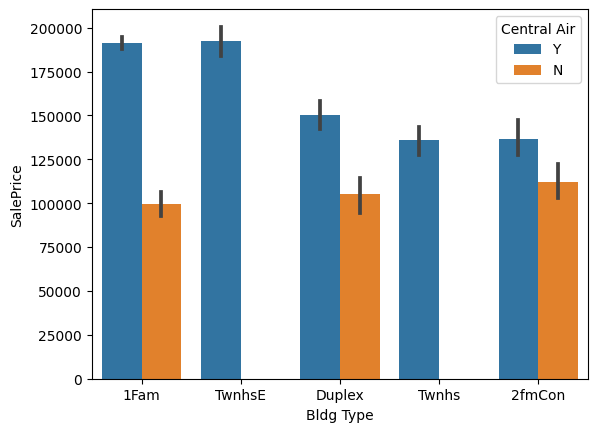

In [15]:
# using seaborn to plot the group means by Building type colored by central air
ax = sns.barplot(data=df, x='Bldg Type', y='SalePrice', hue='Central Air')

Notice that our BldgTypes are still on the x-axis, but each building type no longer has a different color.

Instead, Blue was used to represent homes with Central Air ("Y"), and Orange was used to represent homes without Central Air ("N").

Note that this graph would be VERY hard to reproduce with matplotlib. It is possible, but it would take many more lines of code and the final result would not be as aesthetically pleasing.

Before we added Central Air as the hue, we saw that "1Fam" and "TwnhsE" had the highest average Sale Prices.

Now that we have added Central Air, we can see that this was a little misleading.

TwnheE and Single Family with Central Air have the highest Sale Price. If we look at the 1Fam homes without Central Air, we can see that these homes have the lowest Sale Price.

Note that you may want to test out swapping which column to use as x and which to use as hue, depending on which column we want to compare across groups.

Let's swap our x and hue so that our binary category of Bldg Type is the hue.

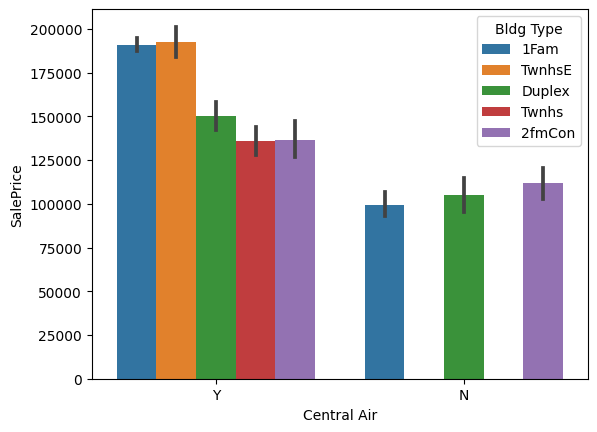

In [16]:
# using seaborn to plot the group means by central air colored by Bldg type
ax = sns.barplot(data=df, x='Central Air', y='SalePrice', hue='Bldg Type')

In this case, using the binary category of Central Air (Y/N) as the x feature and the "Bldg type" feature as the hue makes it harder to compare the effect of having Central Air.